This Project is Developed by **Ananda Chaudhary**

**GitHub** : "https://github.com/anandacdr"

## Task 2 - Prediction Using Unsupervised Learning

- From the Iris dataset, Predict the optimum number of clusters and represent it visually

**Dataset** : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [2]:
# load dataset
iris = pd.read_csv("Iris.csv")
iris.sample(5) # random 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [3]:
# check the missing values (null value)
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# describe operation
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualization

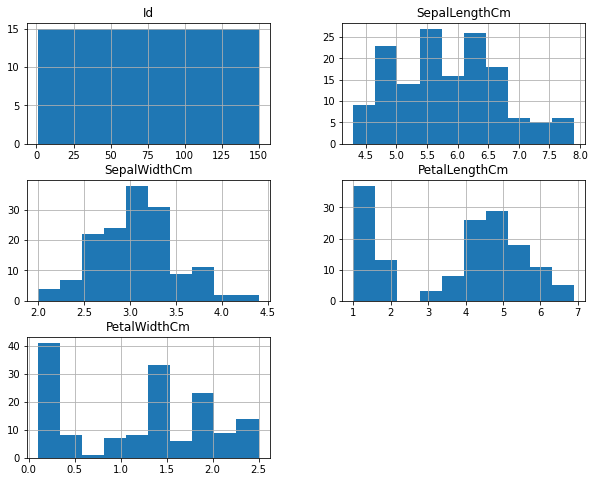

In [5]:
# histograms for numerical features
iris.hist(figsize=(10, 8))
plt.show()

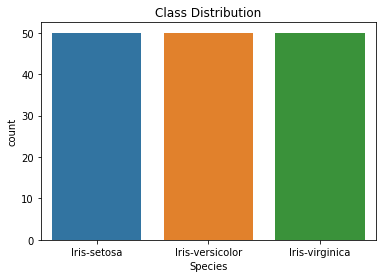

In [6]:
# bar plot for class distribution
sns.countplot(x='Species', data=iris)
plt.title("Class Distribution")
plt.show()

## Determine the Optimal Number of Clusters (K)

### *Data Preparation*:

In [14]:
# Extract the feature columns (exclude the 'Id' and 'Species' columns)
X = iris.iloc[:, [1,2,3,4]].values

### *Initialization*:

In [15]:
# Initialize an empty list to store the WCSS values for different K values
wcss = []

### Filtering Warnings:

In [16]:
import warnings

# Filter out the specific warning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


# Determine the optimal number of clusters (K) using the Elbow Method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Elbow Method:

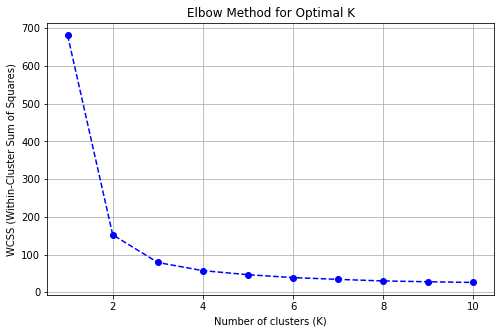

In [13]:
# Create an array of K values (from 1 to 10)
k_values = range(1, 11)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

**In this step, we utilize the Elbow Method to identify the optimal number of clusters(K) for K-means clustering. The process involves running K-means clustering for a range of K values and plotting the Within-Cluster Sum of Squares(WCSS) against K. The goal is to locate the "elbow point" in the WCSS curve, which signifies the ideal K value. We begin by preparing the data, extracting the relevant feature columns while signifies the ideal K value. We begin by preparing the data, extracting the relevant feature columns while excluding non-numeric data like 'Is' and 'Species'. We then iteratively perform K-means clustering for K values from 1 to 10, storing the WCSS for each run. Finally, we visualize the WCSS curve and pinpoint the elbow point as our optimal K value, providing a curcial insight for subsequent clustering analysis.**